In [1]:
pip install opencv-python numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

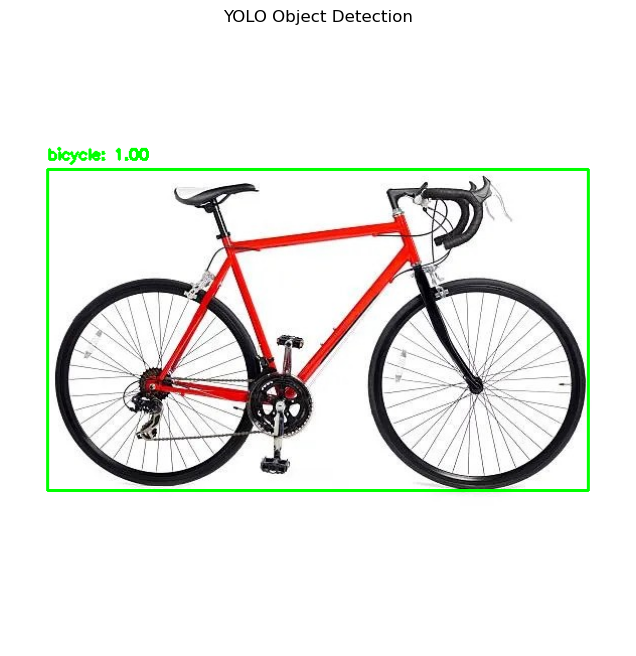

In [5]:
# Function to display images in Jupyter Notebook
def display_image(img, title="Image"):
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Load YOLO model weights and configuration
weights_path = r"C:\Users\DADA'S Comp\Desktop\CV_Project\yolov4.weights"
config_path = r"C:\Users\DADA'S Comp\Desktop\CV_Project\yolov4.cfg"
class_names_path = r"C:\Users\DADA'S Comp\Desktop\CV_Project\coco.names"

# Load the class labels
with open(class_names_path, "r") as f:
    class_labels = [line.strip() for line in f.readlines()]

# Load the YOLO model
net = cv2.dnn.readNet(weights_path, config_path)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Set up YOLO output layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load the input image
image_path = r"C:\Users\DADA'S Comp\Desktop\CV_Project\bicycle.jpg"
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found. Please check the file path.")
else:
    height, width, channels = image.shape

    # Prepare the image for YOLO
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Perform forward pass and get detections
    outputs = net.forward(output_layers)

    # Post-process YOLO outputs
    class_ids = []
    confidences = []
    boxes = []

    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            # Filter out weak detections
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Calculate top-left corner of the bounding box
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply non-maxima suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

    # Draw bounding boxes and labels
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = f"{class_labels[class_ids[i]]}: {confidences[i]:.2f}"
        color = (0, 255, 0)  # Bounding box color (green)

        # Draw bounding box
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        # Add label text
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Display the image with detections
    display_image(image, title="YOLO Object Detection")
